# Solution 2: 

A > Training Smaples : 8143    
    Test Samples : 9752

Reference used : https://towardsdatascience.com/feed-forward-neural-networks-how-to-successfully-build-them-in-python-74503409d99a

In [13]:
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layers.

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Sklearn
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

import tensorflow as tf
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Tensorflow/Keras: 2.11.0
pandas: 1.4.2
numpy: 1.23.5
sklearn: 1.0.2
plotly: 5.6.0


In [14]:
# Set Pandas options to display more columns
pd.options.display.max_columns=50


In [15]:
test_df = pd.read_csv('testData.txt', encoding='utf-8')
train_df = pd.read_csv('trainData.txt', encoding='utf-8')

test_df.info()

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  

In [11]:
##### Step 1 - Select data for modeling
X = train_df.iloc[:5000, 1:6]
Y = test_df.iloc[:5000, -1:]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.4, random_state=0)

In [10]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(4000, 5) (4000, 1) (1000, 5) (1000, 1)


In [16]:
##### Step 2 - Create training and testing samples
model = tf.keras.Sequential()
model.add(Dense(16, activation='relu',input_shape=(5, ))) 
model.add(Dense(32, activation='softplus')) 
model.add(Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [17]:
lossfunction = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer= 'adam', loss= lossfunction, metrics=['accuracy'])

In [18]:
fitmodel = model.fit(train_x, train_y, epochs=5, validation_split=0.3)

Epoch 1/5
66/66 [==============================] - 1s 7ms/step - loss: 1.6901 - accuracy: 0.7095 - val_loss: 0.6964 - val_accuracy: 0.7744
Epoch 2/5
66/66 [==============================] - 0s 4ms/step - loss: 0.5845 - accuracy: 0.7690 - val_loss: 0.5323 - val_accuracy: 0.7856
Epoch 3/5
66/66 [==============================] - 0s 3ms/step - loss: 0.5916 - accuracy: 0.7838 - val_loss: 0.5440 - val_accuracy: 0.7567
Epoch 4/5
66/66 [==============================] - 0s 3ms/step - loss: 0.6345 - accuracy: 0.7905 - val_loss: 0.5088 - val_accuracy: 0.7289
Epoch 5/5
66/66 [==============================] - 0s 4ms/step - loss: 0.5456 - accuracy: 0.7738 - val_loss: 0.4817 - val_accuracy: 0.8356


In [19]:
train_loss, train_acc = model.evaluate(train_x, train_y)
test_loss, test_acc = model.evaluate(test_x, test_y)

63/63 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.8370


Epoch 1/5
66/66 [==============================] - 0s 4ms/step - loss: 0.4961 - accuracy: 0.8205 - val_loss: 0.3896 - val_accuracy: 0.8111
Epoch 2/5
66/66 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8467 - val_loss: 0.3992 - val_accuracy: 0.8511
Epoch 3/5
66/66 [==============================] - 0s 3ms/step - loss: 0.4609 - accuracy: 0.8124 - val_loss: 0.3654 - val_accuracy: 0.8667
Epoch 4/5
66/66 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 0.8186 - val_loss: 0.4434 - val_accuracy: 0.8256
Epoch 5/5
66/66 [==============================] - 0s 3ms/step - loss: 0.4300 - accuracy: 0.8300 - val_loss: 0.3643 - val_accuracy: 0.8356


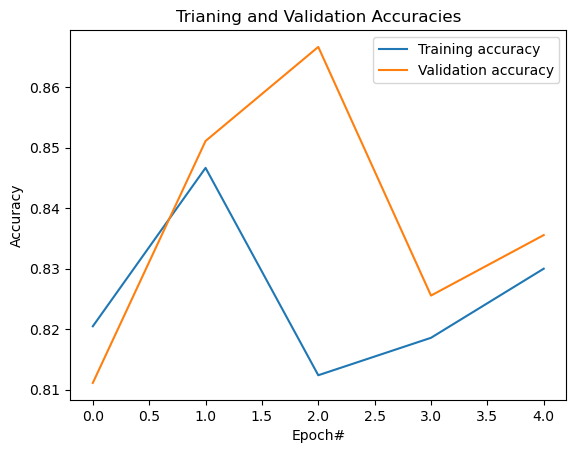

In [31]:
fitModel = model.fit(train_x, train_y, epochs = 5, validation_split = 0.3)

# Update axes lines
plt.plot(fitModel.history['accuracy'])
plt.plot(fitModel.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Trianing and Validation Accuracies')
plt.xlabel('Epoch#')
plt.ylabel('Accuracy')  # Update axes lines
plt.show()



In [21]:
prediction = model.predict(test_x)
test_prediction = np.argmax(prediction, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_prediction)
print(confusion_matrix)

63/63 [==============================] - 0s 2ms/step
tf.Tensor(
[[1622    0]
 [ 378    0]], shape=(2, 2), dtype=int32)


Text(0, 0.5, 'Loss')

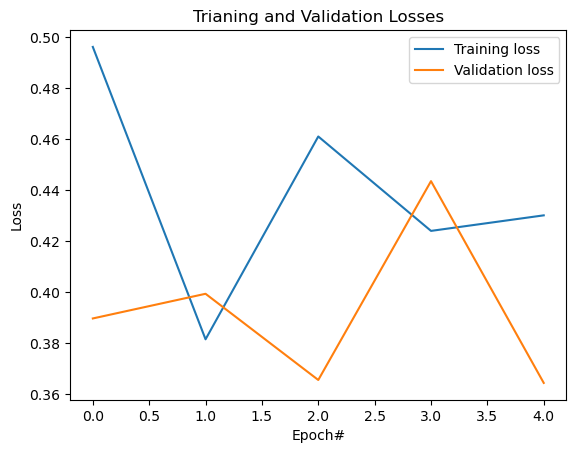

In [32]:
plt.plot(fitModel.history['loss'])
plt.plot(fitModel.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Trianing and Validation Losses')
plt.xlabel('Epoch#')
plt.ylabel('Loss')

In [34]:
#Step 1 - Select data for modeling
##### Step 2 - Create training and testing samples
test_predict = model.predict(test_x)
test_predict_labels = np.argmax(test_predict, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = test_y, predictions = test_predict_labels)
print('confusion Matrix\n', confusion_matrix)

63/63 [==============================] - 0s 2ms/step
confusion Matrix
 tf.Tensor(
[[1622    0]
 [ 378    0]], shape=(2, 2), dtype=int32)


In [35]:
##### Step 3 - Specify the structure of a neural network
model2 = tf.keras.Sequential() #model
model2.add(Dense(16, activation='relu',input_shape=(5, ))) # Input Layer - need to speicfy the shape of inputs
model2.add(Dense(32, activation='softplus'))
model2.add(Dense(32, activation='softplus')) 
model2.add(Dense(1, activation='sigmoid')) 

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                96        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Loss function to be optimized. 
lossfunction = tf.keras.losses.BinaryCrossentropy()
model2.compile(optimizer= 'adam', loss= lossfunction, metrics=['accuracy'])

In [39]:
 ##Step 5 - Fit keras model on the dataset
training_loss, training_acc = model2.evaluate(train_x, train_y)
testing_loss, testing_acc = model2.evaluate(test_x, test_y)
prediction = model2.predict(test_x)
test_prediction = np.argmax(prediction, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_prediction)
print(confusion_matrix)

63/63 [==============================] - 0s 2ms/step
tf.Tensor(
[[1622    0]
 [ 378    0]], shape=(2, 2), dtype=int32)


Epoch 1/5
66/66 [==============================] - 0s 4ms/step - loss: 0.4866 - accuracy: 0.8105 - val_loss: 0.5617 - val_accuracy: 0.7389
Epoch 2/5
66/66 [==============================] - 0s 3ms/step - loss: 0.6125 - accuracy: 0.7900 - val_loss: 0.5860 - val_accuracy: 0.7878
Epoch 3/5
66/66 [==============================] - 0s 4ms/step - loss: 0.5941 - accuracy: 0.7843 - val_loss: 0.6966 - val_accuracy: 0.8167
Epoch 4/5
66/66 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.8305 - val_loss: 0.3895 - val_accuracy: 0.8044
Epoch 5/5
66/66 [==============================] - 0s 4ms/step - loss: 0.5050 - accuracy: 0.7971 - val_loss: 0.4179 - val_accuracy: 0.8222


Text(0, 0.5, 'Accuracy')

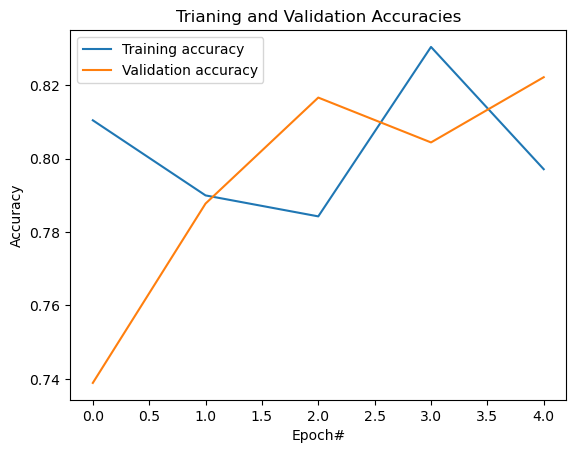

In [42]:
#Step 6 - Use model to make predictions
# Predict class labels on training data

fitModel = model2.fit(train_x, train_y, epochs = 5, validation_split = 0.3)


plt.plot(fitModel.history['accuracy'])
plt.plot(fitModel.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Trianing and Validation Accuracies')
plt.xlabel('Epoch#')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

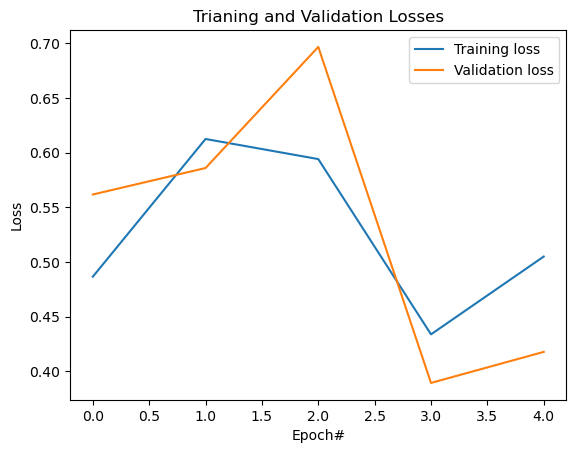

In [44]:
plt.plot(fitModel.history['loss'])
plt.plot(fitModel.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Trianing and Validation Losses')
plt.xlabel('Epoch#')
plt.ylabel('Loss')